In [5]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_data = np.array([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]],
                  dtype=np.float32)
y_data = np.array([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [1, 0, 0]],
                  dtype=np.float32)

nb_classes = 3


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape=(4,)))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_data, y_data, epochs=2000)

W0723 00:17:23.034000 140292780402560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8 samples
Epoch 1/2000
8/8 [==============================] - 0s 8ms/sample - loss: 7.4163 - accuracy: 0.3750
Epoch 2/2000
8/8 [==============================] - 0s 644us/sample - loss: 7.3783 - accuracy: 0.3750
Epoch 3/2000
8/8 [==============================] - 0s 199us/sample - loss: 7.3507 - accuracy: 0.3750
Epoch 4/2000
8/8 [==============================] - 0s 387us/sample - loss: 7.3278 - accuracy: 0.3750
Epoch 5/2000
8/8 [==============================] - 0s 181us/sample - loss: 7.3074 - accuracy: 0.3750
Epoch 6/2000
8/8 [==============================] - 0s 190us/sample - loss: 7.2887 - accuracy: 0.3750
Epoch 7/2000
8/8 [==============================] - 0s 203us/sample - loss: 7.2713 - accuracy: 0.3750
Epoch 8/2000
8/8 [==============================] - 0s 206us/sample - loss: 7.2549 - accuracy: 0.3750
Epoch 9/2000
8/8 [==============================] - 0s 184us/sample - loss: 7.2391 - accuracy: 0.3750
Epoch 10/2000
8/8 [==============================] - 0s 179us/sam

In [10]:
print(model.predict_classes(x_data))
print(model.predict_classes(np.array([[1, 2, 1, 1]])))
print(model.predict_classes(np.array([[1, 2, 5, 6]])))

[2 2 2 1 1 1 1 1]
[2]
[1]


In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


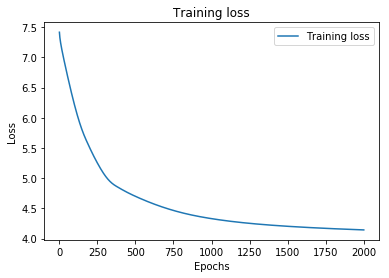

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

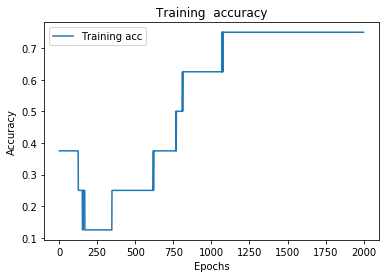

In [13]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()